## Report: This project analyzes the number of car registrations with electric drive in comparison with the price for electric energy.


## The following two data sources are used:
#### Source 1: New car registrations per year in Germany with alternative drives (including electric drives)

- Metadata URL: https://mobilithek.info/offers/573358160767496192
- URL: (https://www.kba.de/SharedDocs/Downloads/DE/Statistik/Fahrzeuge/FZ28/fz28_2022_09.xlsx?__blob=publicationFile&v=4) 
- Type: xlsx

This project uses open data from the Mobilithek to calculate the number of new electric cars on the road each year.


#### Source 2: Energy prices per year in Germany

- Metadata URL: https://www.govdata.de/web/guest/suchen/-/details/strompreise-fur-haushalte-deutschland-jahrejahresverbrauchsklassen-preisbestandteile
- URL: (https://www-genesis.destatis.de/genesis/downloads/00/tables/61243-0002_00.csv)
- Type: CSV
 The second data is from govdata.com to get the required energy bills.

### The question that interests me is: Will more electric cars cause energy prices to rise?

## Installing dependencies
First install all required dependencies. The specific version of SQLAlchemy is needed because SQLAlchemy 2.0 does not yet work with pandas. nbformat allows the use of the "notebook" formatter for plotting, others cannot be rendered to HTML.  Matplotlib is used to visualize the data in a coordinate system.

In [1]:
%pip install pandas
%pip install plotly
%pip install 'SQLAlchemy==1.4.46'
%pip install nbformat
%pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Loading data
Create a Pandas dataframe using the local sqlite file. The module operating system is loaded to run the pipeline and filter to get the Result.sqlite file. 

The file 'data.sqlite' is used to get a good representation of the data.

In [52]:
import pandas as pd
import os

pathtablefilter = "./project/tablefilter.py"
pathAutomatedDatapipeline = "./project/AutomatedDataPipeline.py"
print(os.path.abspath(pathAutomatedDatapipeline))

def runAutomatedDatapPipeline():
    command = "python " + os.path.abspath(pathAutomatedDatapipeline)
    os.system(command)
def runtablefilter():
    command = "python " + os.path.abspath(pathtablefilter)
    os.system(command)
    
def main():
    runAutomatedDatapPipeline()
    runtablefilter()
    
if __name__ == "__main__":
    main()

df = pd.read_sql_table('Cars', 'sqlite:///./data.sqlite')

/Users/carstenschmotz/Documents/GitHub/2023-AMSE-cs/project/AutomatedDataPipeline.py
First Download DONE 
Second Download DONE 
Carfilter done
Energyfilter done


## Do electric cars on the streets of Germany have an impact on the electricity bill?
To answer our first question, we use matplotlib.pyplot to plot two graphs. One for the number of new electric cars in Germany per year. The other to visualize the energy costs for a household in Germany per year.

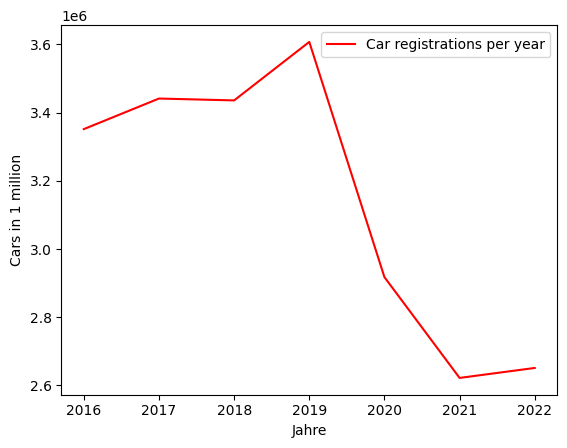

In [43]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


conn = sqlite3.connect('./data.sqlite')
cursor = conn.cursor()

cars_axes = "SElECT Monat, Insgesamt FROM Cars"
prize_axes = "SELECT Jahr, Insgesamt FROM Prize"

df1 = pd.read_sql_query(cars_axes, conn)
df2 = pd.read_sql_query(prize_axes, conn)
conn.close()

x1 = ['2016','2017','2018','2019','2020','2021','2022']#df1['Monat']
#x1 = df1['Monat']
x2 = df2['Jahr']
y1 = df1['Insgesamt']
y2 = df2['Insgesamt']

fig, ax1= plt.subplots()

ax1.plot(x1,y1,'r-',label='Car registrations per year')
ax1.set_xlabel('Jahre')
ax1.set_ylabel('Cars in 1 million')
ax1.legend()



plt.show()




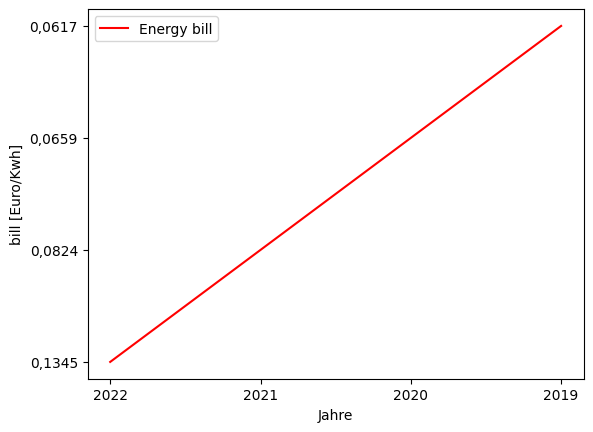

In [51]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


conn = sqlite3.connect('./data.sqlite')
cursor = conn.cursor()

cars_axes = "SElECT Monat, Insgesamt FROM Cars"
prize_axes = "SELECT Jahr, Insgesamt FROM Prize"

df1 = pd.read_sql_query(cars_axes, conn)
df2 = pd.read_sql_query(prize_axes, conn)
conn.close()

#x1= ['2019','2020','2021','2022']
x2 = df2['Jahr']
y1 = df1['Insgesamt']
y2 = df2['Insgesamt']

fig, ax2= plt.subplots()

ax2.plot(x2,y2,'r-',label='Energy bill')
ax2.set_xlabel('Jahre')
ax2.set_ylabel('bill [Euro/Kwh]')
ax2.legend()




plt.show()

## Interpretation

The graph for the car registration form 2016 to 2022 in the unit 1 million.
It shows a decrease per year until 2019 and after that the number drops from 3.6 million to 2.6 million.

On the other hand, the energy bill has a range from 2022 to 2019. The data set does not get the order of the data correctly. The reverse process of the data set creates some error. 
The graph shows a constant increase in energy prices in Germany.

## Result.

The two graphs together give the impression that the decrease in car registrations has increased energy prices. 
The first question cannot be answered clearly. It can be interpreted as no, there is no effect on the prices.

To get a clearer answer, more data needs to be examined and other variables/factors need to be taken into account.
The Ukraine crisis has increased prices everywhere. Some power plants are being shut down because of environmental laws in Germany.

These things and more have to be considered.

## All in all 
The question: Will more electric cars cause energy prices to rise?

#### The answer is no.